Plots saved in output_plots


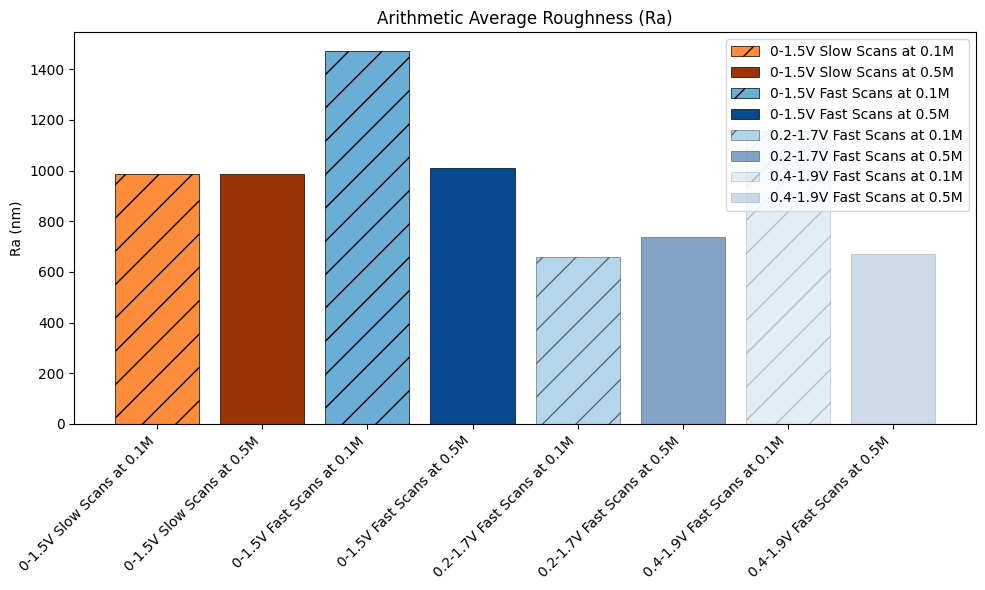

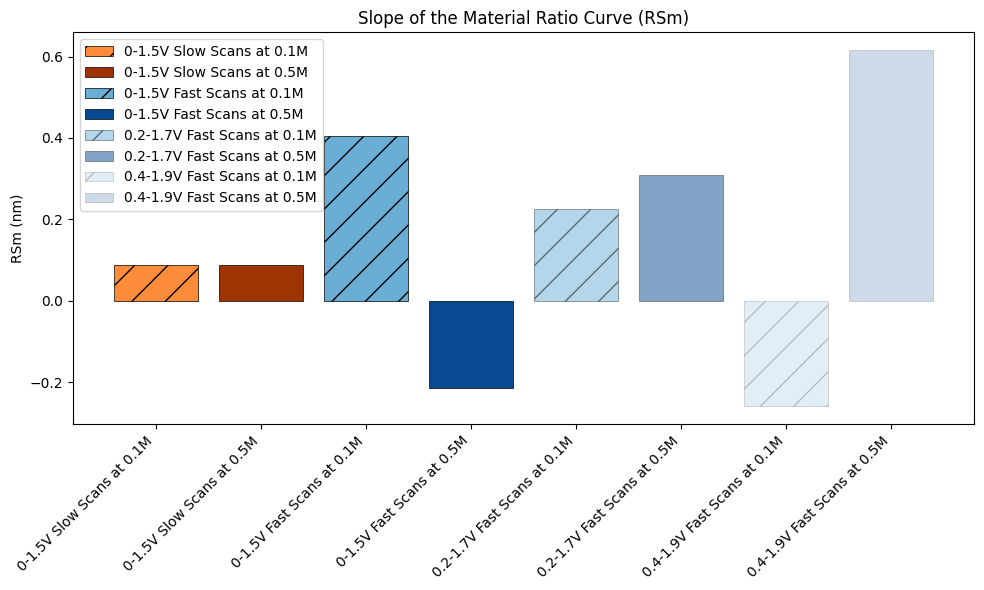

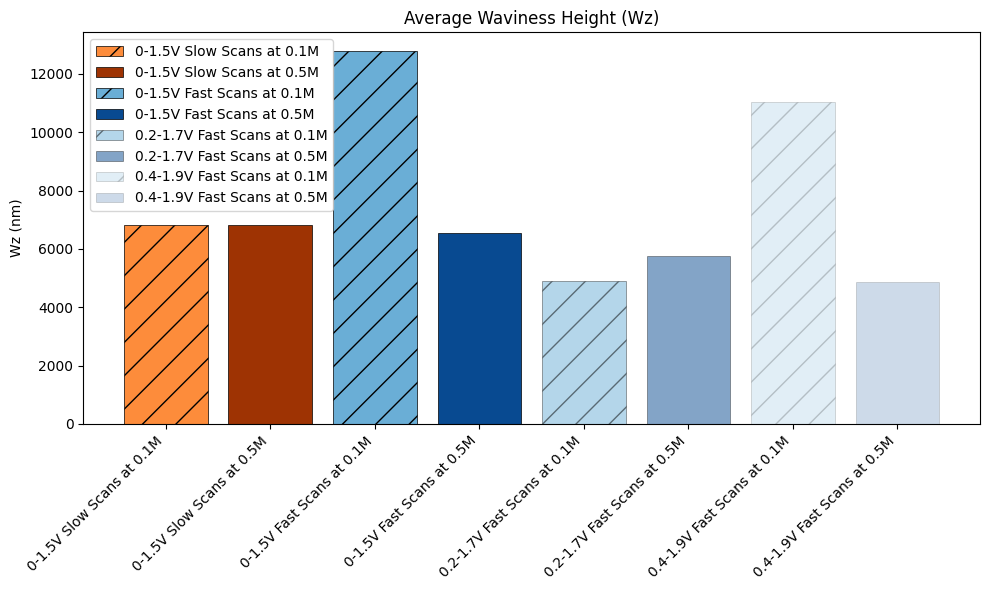

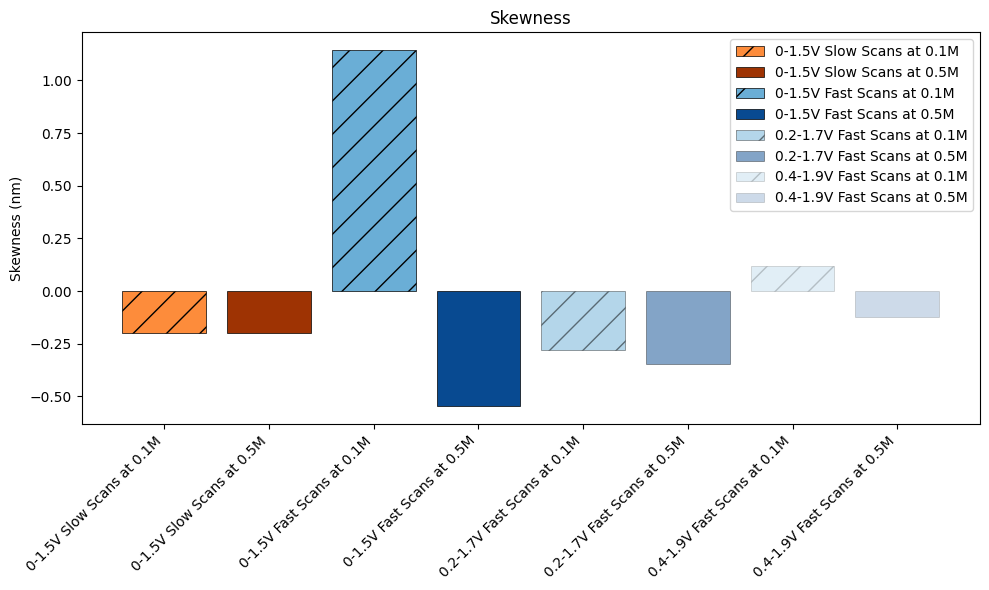

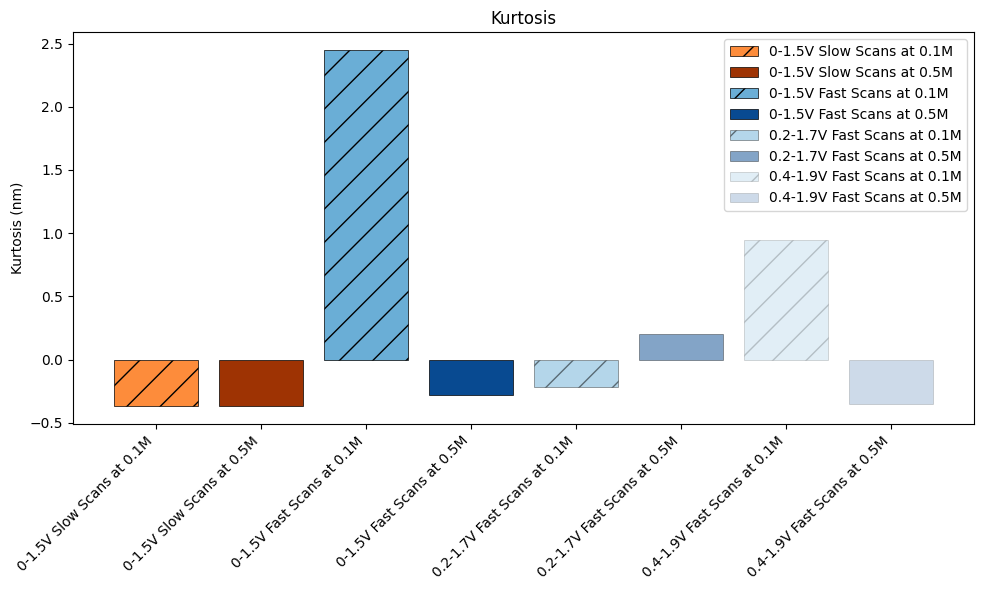

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os  # for file operations

# Data from the table
data = {
    'Sheet Name': [
        '0-1.5V Slow Scans at 0.1M', '0-1.5V Slow Scans at 0.5M', 
        '0-1.5V Fast Scans at 0.1M', '0-1.5V Fast Scans at 0.5M',
        '0.2-1.7V Fast Scans at 0.1M', '0.2-1.7V Fast Scans at 0.5M',
        '0.4-1.9V Fast Scans at 0.1M', '0.4-1.9V Fast Scans at 0.5M'
    ],
    'Ra': [
        985.389560, 985.389560, 1472.069613, 1010.743196, 
        658.445198, 738.857711, 1154.617786, 670.510407
    ],
    'RSm': [
        0.088048, 0.088048, 0.403604, -0.214577, 
        0.226008, 0.307763, -0.259242, 0.615666
    ],
    'Wz': [
        6834.140992, 6834.140992, 12787.905299, 6564.209250, 
        4894.088893, 5744.028609, 11055.588186, 4860.367642
    ],
    'Skewness': [
        -0.197563, -0.197563, 1.143750, -0.546961, 
        -0.280231, -0.344748, 0.119866, -0.124961
    ],
    'Kurtosis': [
        -0.367633, -0.367633, 2.447781, -0.276961, 
        -0.219321, 0.204537, 0.948928, -0.349755
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define colors for different categories and gradients
colors = {
    'Slow Scans 0.1M': plt.cm.Oranges(0.5),
    'Slow Scans 0.5M': plt.cm.Oranges(0.9),
    'Fast Scans 0.1M': plt.cm.Blues(0.5),
    'Fast Scans 0.5M': plt.cm.Blues(0.9)
}

# Define hatch patterns for 0.1M and 0.5M
hatches = {
    '0.1M': '/',
    '0.5M': ''
}

# Plotting parameters
parameters = ['Ra', 'RSm', 'Wz', 'Skewness', 'Kurtosis']
titles = [
    'Arithmetic Average Roughness (Ra)',
    'Slope of the Material Ratio Curve (RSm)',
    'Average Waviness Height (Wz)',
    'Skewness',
    'Kurtosis'
]

# Create a directory to save plots if it doesn't exist
output_dir = 'output_plots'
os.makedirs(output_dir, exist_ok=True)

# Loop through each parameter to create individual plots
for param, title in zip(parameters, titles):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Loop through each sheet to plot bars
    for j, row in df.iterrows():
        sheet_name = row['Sheet Name']
        
        # Determine the color based on fast/slow scans and starting voltage
        if 'Slow Scans' in sheet_name:
            if '0.1M' in sheet_name:
                color = colors['Slow Scans 0.1M']
            else:
                color = colors['Slow Scans 0.5M']
        else:
            if '0.1M' in sheet_name:
                color = colors['Fast Scans 0.1M']
            else:
                color = colors['Fast Scans 0.5M']
        
        # Adjust alpha channel based on the starting voltage
        if '0.2-' in sheet_name:
            alpha = 0.5  # Lighten the color for 0.2 starting voltage
        elif '0.4-' in sheet_name:
            alpha = 0.2  # Further lighten the color for 0.4 starting voltage
        else:
            alpha = 1.0  # Default alpha
        
        # Plot the bar with appropriate color and hatch pattern
        ax.bar(sheet_name, row[param], label=sheet_name, color=color, hatch=hatches.get('0.1M' if '0.1M' in sheet_name else '0.5M', ''),
               edgecolor='black', linewidth=0.5, alpha=alpha)
    
    ax.set_title(title)
    ax.set_ylabel(f'{param} (nm)')  # Assuming Z values are in nanometers

    # Add a legend
    ax.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adjust layout
    plt.tight_layout()

    # Save the plot as PNG file in the output folder
    plt.savefig(os.path.join(output_dir, f"{param}_plot.png"))

    # Show the plot (optional)
    # plt.show()

# Display the plots in the output folder
print(f"Plots saved in {output_dir}")

# Optionally, display the plots inline in Jupyter Notebook
# plt.show()
